In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA


In [63]:
df = pd.read_csv('./datasets/earthquake_ir.csv')
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-04-14T03:45:58.966Z,32.0636,50.0818,10.0,4.5,mb,49.0,62.0,7.640,0.70,...,2023-04-14T04:10:53.040Z,"50 km WSW of F?rs?n, Iran",earthquake,3.40,1.869,0.081,45.0,reviewed,us,us
1,2023-04-07T23:38:12.647Z,28.1032,56.9952,10.0,4.1,mb,55.0,51.0,3.224,0.49,...,2023-04-16T03:29:38.040Z,"108 km N of M?n?b, Iran",earthquake,4.98,1.882,0.088,35.0,reviewed,us,us
2,2023-04-04T14:53:08.017Z,28.2978,56.9272,10.0,4.0,mb,25.0,144.0,3.401,0.94,...,2023-04-04T16:27:10.040Z,"109 km S of K?h Sef?d, Iran",earthquake,13.03,1.950,0.126,17.0,reviewed,us,us
3,2023-04-03T03:55:02.834Z,28.0114,56.9150,10.0,4.3,mb,50.0,108.0,3.119,0.43,...,2023-04-03T04:15:26.040Z,NaN,earthquake,10.57,1.906,0.086,38.0,reviewed,us,us
4,2023-04-02T07:55:27.919Z,27.1929,52.9741,10.0,4.4,mb,40.0,86.0,3.667,0.56,...,2023-04-02T08:20:38.040Z,NaN,earthquake,8.41,1.898,0.095,32.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,2010-01-13T10:22:13.170Z,26.7370,53.5670,10.0,4.8,mb,86.0,98.3,NaN,0.91,...,2014-11-07T01:40:27.426Z,"49 km WNW of K?sh, Iran",earthquake,NaN,NaN,NaN,15.0,reviewed,us,us
2791,2010-01-10T17:17:48.720Z,27.0620,55.6140,10.0,4.7,mb,87.0,106.2,NaN,1.19,...,2014-11-07T01:40:26.351Z,"66 km W of Qeshm, Iran",earthquake,NaN,NaN,NaN,28.0,reviewed,us,us
2792,2010-01-10T15:20:33.170Z,26.9850,55.5700,10.0,4.7,mb,66.0,106.3,NaN,0.82,...,2014-11-07T01:40:26.337Z,"69 km W of Qeshm, Iran",earthquake,NaN,NaN,NaN,12.0,reviewed,us,us
2793,2010-01-10T06:52:24.000Z,35.7000,48.9700,4.0,4.1,mblg,29.0,95.0,NaN,NaN,...,2014-11-07T01:40:26.278Z,"54 km SSW of Abhar, Iran",earthquake,NaN,NaN,NaN,NaN,reviewed,teh,teh


In [82]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1850
gap                 359
dmin               1061
rms                 485
net                   0
id                    0
updated               0
place                 9
type                  0
horizontalError     987
depthError          639
magError            715
magNst              218
status                0
locationSource        0
magSource             0
dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             2795 non-null   object 
 1   latitude         2795 non-null   float64
 2   longitude        2795 non-null   float64
 3   depth            2795 non-null   float64
 4   mag              2795 non-null   float64
 5   magType          2795 non-null   object 
 6   nst              945 non-null    float64
 7   gap              2436 non-null   float64
 8   dmin             1734 non-null   float64
 9   rms              2310 non-null   float64
 10  net              2795 non-null   object 
 11  id               2795 non-null   object 
 12  updated          2795 non-null   object 
 13  place            2786 non-null   object 
 14  type             2795 non-null   object 
 15  horizontalError  1808 non-null   float64
 16  depthError       2156 non-null   float64
 17  magError      

In [84]:
df["place"].value_counts()

southern Iran                         39
Iran-Iraq border region               16
56 km NNE of Kerman, Iran              7
western Iran                           6
98 km SE of Bushehr, Iran              6
                                      ..
36 km SW of Jav?nr?d, Iran             1
9 km S of Jav?nr?d, Iran               1
33 km ENE of Sarpol-e Z?ah?b, Iran     1
23 km SW of Jav?nr?d, Iran             1
99 km ESE of Ger?sh, Iran              1
Name: place, Length: 2348, dtype: int64

In [64]:
# Get subset of data with only latitude and longitude
simple_df = df[['latitude', 'longitude']]
simple_df

,latitude,longitude
0,32.0636,50.0818
1,28.1032,56.9952
2,28.2978,56.9272
3,28.0114,56.9150
4,27.1929,52.9741
...,...,...
2790,26.7370,53.5670
2791,27.0620,55.6140
2792,26.9850,55.5700
2793,35.7000,48.9700


In [65]:
# Find the best min_points and eps for DBSCAN using silhouette score
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

score_by_min_points_by_eps = {}
for min_points in range(2, 10):
    score_by_min_points_by_eps[min_points] = {}
 
for min_points in range(2, 10):
    for eps in range(1, 10):
        dbscan = DBSCAN(eps=eps/10, min_samples=min_points)
        dbscan.fit(simple_df)
        labels = dbscan.labels_
        score = silhouette_score(simple_df, labels)
        score_by_min_points_by_eps[min_points][eps/10] = score

In [66]:
pd.DataFrame(score_by_min_points_by_eps)

,2,3,4,5,6,7,8,9
0.1,0.133716,0.093652,0.037927,-0.005610,-0.052972,-0.104737,-0.136751,-0.181715
0.2,-0.123490,-0.101704,0.066172,0.086460,0.032477,0.057993,0.056388,0.053927
0.3,-0.457212,-0.458854,-0.411049,-0.439303,-0.227347,-0.078337,-0.013375,-0.025290
0.4,-0.455509,-0.293129,-0.298242,-0.281085,-0.293998,-0.189005,-0.195821,-0.128752
0.5,-0.364836,-0.243174,-0.217772,-0.201861,-0.191426,-0.105744,-0.112810,-0.043418
0.6,-0.263505,-0.227839,-0.215134,-0.212468,-0.217403,-0.208661,-0.091287,-0.035368
0.7,-0.270478,-0.253453,-0.241443,-0.162924,-0.166411,-0.174038,-0.186632,-0.006447
0.8,-0.022482,-0.001711,-0.004703,0.019174,-0.030407,-0.036457,-0.158717,-0.130496
0.9,-0.404987,-0.126906,-0.126906,-0.115645,-0.185173,-0.179866,-0.298410,-0.147098


In [67]:
from tqdm import tqdm


def plot_silhouette_df(df):
    score_by_min_points_by_eps = {}
    for min_points in range(2, 10):
        score_by_min_points_by_eps[min_points] = {}
    

    for min_points in range(2, 10):
        for eps in range(1, 10):
            dbscan = DBSCAN(eps=eps/10, min_samples=min_points)
            dbscan.fit(df)
            labels = dbscan.labels_
            score = silhouette_score(df, labels)
            score_by_min_points_by_eps[min_points][eps/10] = score
            
    plt.figure(figsize=(10, 10))
    sns.lineplot(data=pd.DataFrame(score_by_min_points_by_eps))
    plt.xlabel('eps')
    plt.ylabel('silhouette score')
    plt.legend(title='min_points')
    plt.show()
   

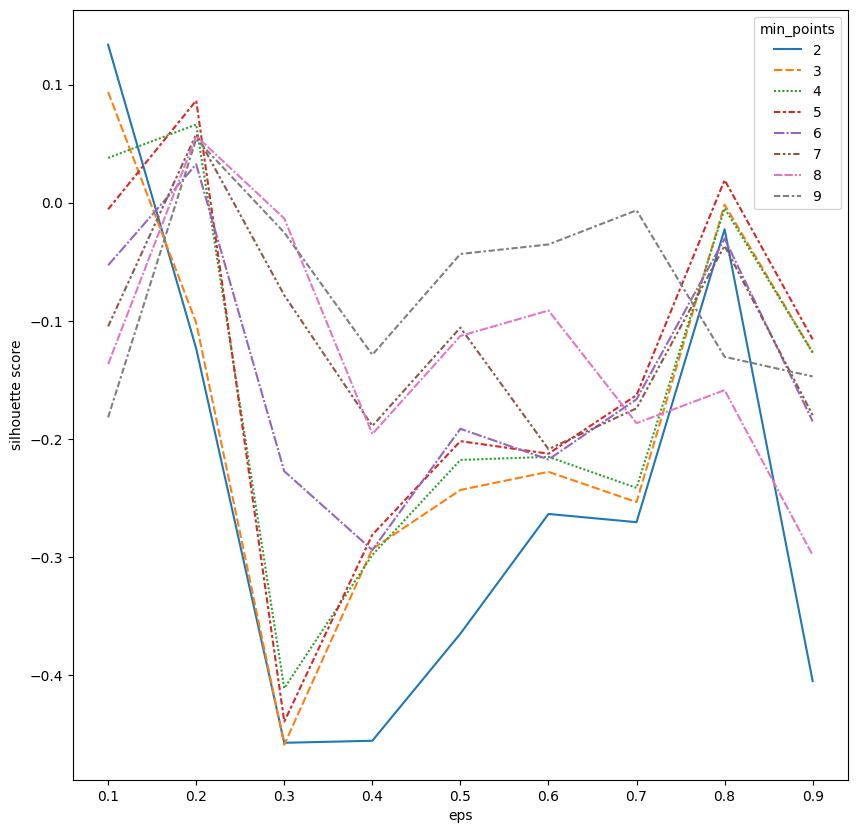

In [68]:
plot_silhouette_df(simple_df)

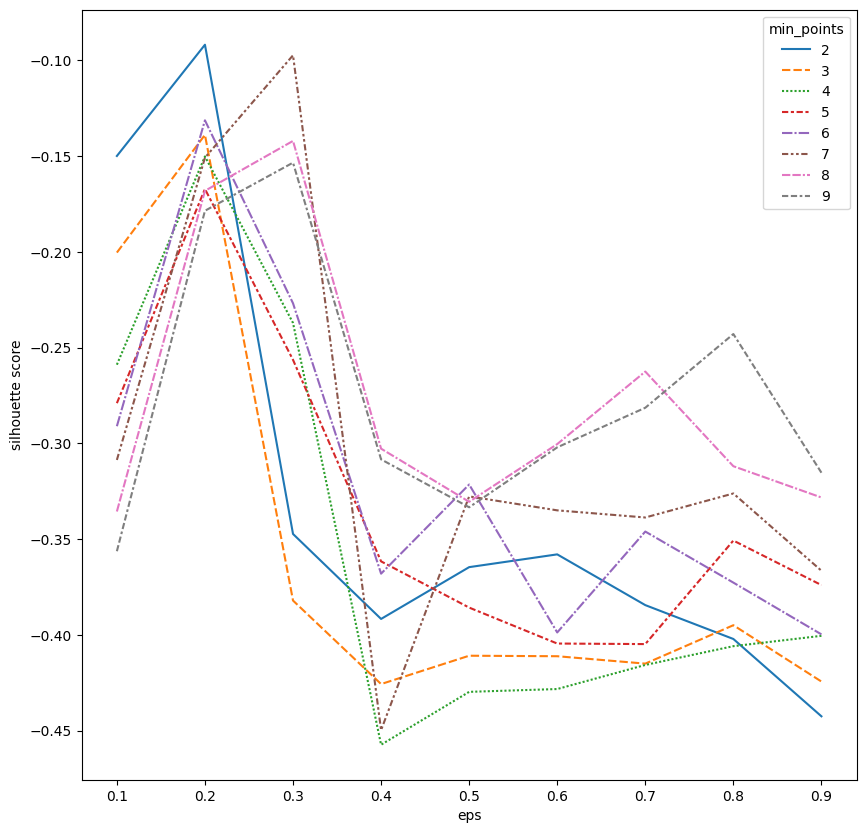

In [72]:
df = pd.read_csv('./datasets/earthquake_ir.csv')
sub_df = df[['latitude', 'longitude','depth']]

plot_silhouette_df(sub_df)

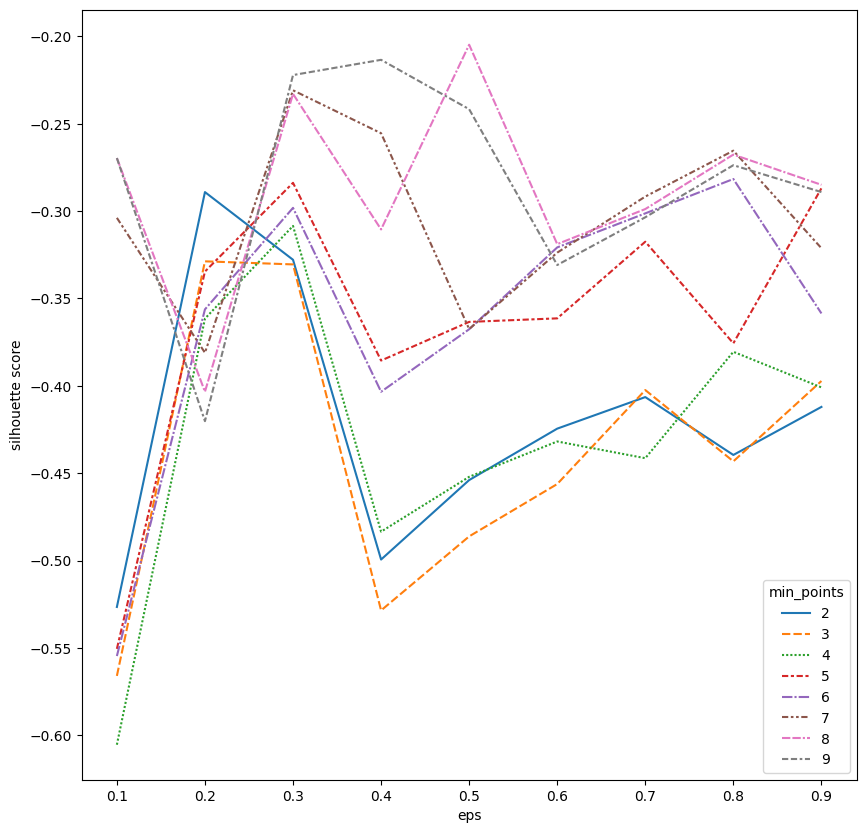

In [71]:
sub_df = df[['latitude', 'longitude','depth','mag']]

plot_silhouette_df(sub_df)

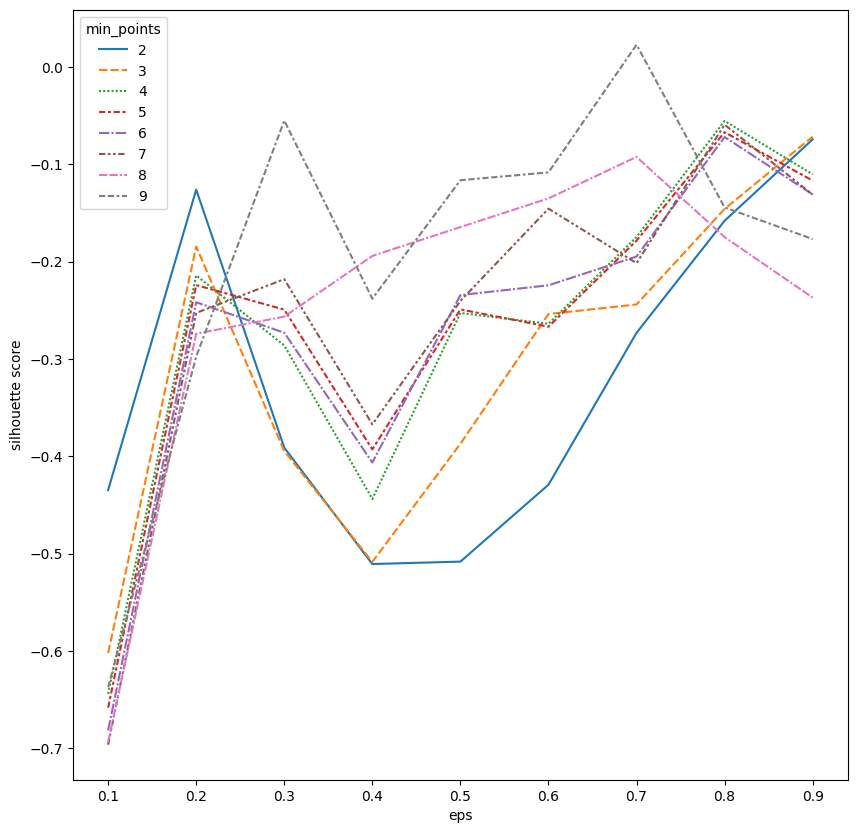

In [74]:
sub_df = df[['latitude', 'longitude','mag']]

plot_silhouette_df(sub_df)

In [75]:
# Do the clusterig using DBSCAN with the best min_points and eps found
dbscan = DBSCAN(eps=0.1, min_samples=2)
dbscan.fit(simple_df)
labels = dbscan.labels_

<Axes: xlabel='latitude', ylabel='longitude'>

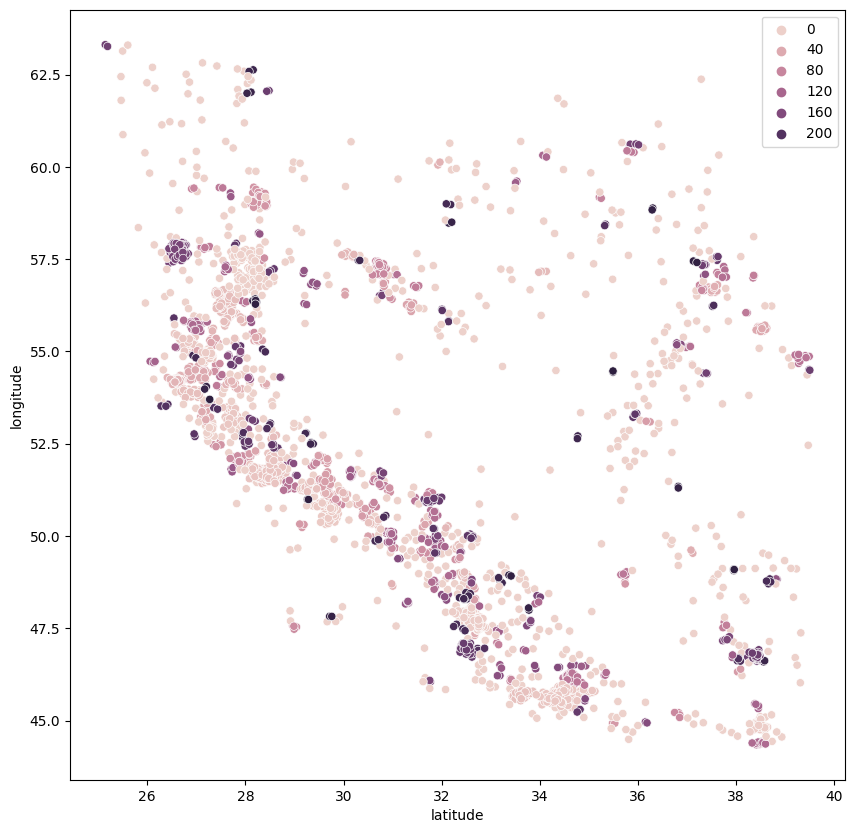

In [81]:
# Visualize the clusters using seaborn using high contrast color palette
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.scatterplot(data=simple_df, x='latitude', y='longitude', hue=labels)
